In [ ]:
%matplotlib inline

# Módulo 4 - Aula 2: SVR

Professora: Esther Colombini -- esther@ic.unicamp.br

Monitores: Alana Santana -- alana.correia@ic.unicamp.br

Este *notebook* faz parte da disciplina INF-0616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina:
[moodle.lab.ic.unicamp.br/610](https://moodle.lab.ic.unicamp.br/moodle/course/view.php?id=610)

Instituto de Computação - Unicamp 2024


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Carrega o dataset
boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print (X_full.shape)
print (Y.shape)

(506, 13)
(506,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Apresentação do dataset
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_full, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


Abaixo selecionamos uma feature (a mais discriminativa) com o SelectKBest, a qual é ajustada aos dados com o método ``.fit ()``. SelectKBest faz isso calculando a correlação de cada feature com a variável alvo. Neste caso iremos reduzir o conjunto de dados a uma só feature (pois `k=1`), que pode ser recuperado pelo método ``.get_support()``.

In [ ]:
# Seleciona 'melhor' feature
selector = SelectKBest(f_regression, k=1)
selector.fit(X_train, y_train)

print("Índice da feature mais importante: ", np.where(selector.get_support() == True))

# Seleciona apenas a coluna da feature
X = X_train[:, selector.get_support()]
Y = y_train
print (X.shape)

Índice da feature mais importante:  (array([12]),)
(354, 1)


Como o target é um vetor, podemos ver se existe uma relação linear da entrada (feature) com a saída (valor da casa). Se existir, a saída se comportará de forma constante a mudanças na entrada.

In [ ]:
# Função para plotar o gráfico

def plot_scatter(X,Y,R=None):
    plt.scatter(X, Y, s=50, marker='o', facecolors='none', edgecolor="blue")
    if R is not None:
        plt.scatter(X, R, color='red', linewidth=0.2)
    plt.show()

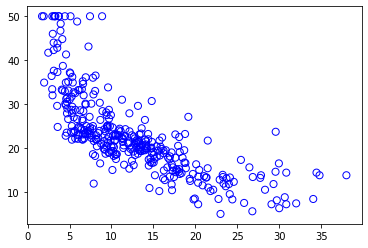

In [ ]:
plot_scatter(X,Y)

No exemplo, podemos ver que ``X`` aumenta e ``Y`` diminui, mas isso não acontece em uma taxa constante.

Para visualizar este fenomeno, o gráfico abaixo tenta plotar uma reta utilizando um kernel linear. Claramente este modelo é uma aproximação que não funciona muito bem.

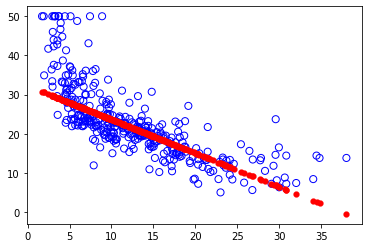

MAE =  4.213434148314895
MSE =  36.83721464991496
R2 =  0.5056276434474074


In [ ]:
regressor = SVR(kernel='linear').fit(X, Y) #plota uma reta

#regressor = SVR(kernel='linear') 
#regressor.fit(X,Y)

plot_scatter(X, Y, regressor.predict(X))


prediction = regressor.predict(X_test[:, selector.get_support()])
print("MAE = ", mean_absolute_error(y_test, prediction))
print("MSE = ", mean_squared_error(y_test, prediction))
print("R2 = ", r2_score(y_test, prediction))

Como o modelo linear não funcionou muito bem, vamos utilizar um modelo não linear:

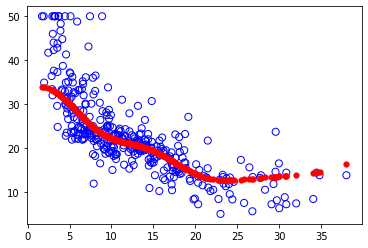

MAE =  3.9141744029388255
MSE =  31.031938279283622
R2 =  0.5835371213235998


In [ ]:
regressor = SVR(kernel='rbf').fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

prediction = regressor.predict(X_test[:, selector.get_support()])
print("MAE = ", mean_absolute_error(y_test, prediction))
print("MSE = ", mean_squared_error(y_test, prediction))
print("R2 = ", r2_score(y_test, prediction))

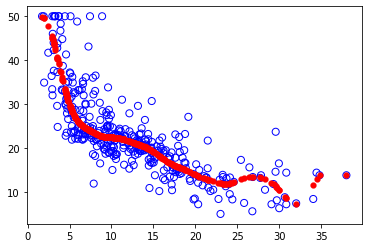

MAE =  3.6282165238471653
MSE =  26.008103263311337
R2 =  0.6509592969517287


In [ ]:
# Testando diferentes valores de 'C' e 'gamma'

regressor = SVR(kernel='rbf', C=100.0, gamma=0.1).fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))


prediction = regressor.predict(X_test[:, selector.get_support()])
print("MAE = ", mean_absolute_error(y_test, prediction))
print("MSE = ", mean_squared_error(y_test, prediction))
print("R2 = ", r2_score(y_test, prediction))

E se utilizarmos todas as features?

In [ ]:
regressor = SVR(kernel='rbf', C=1000, gamma=0.0001).fit(X_train, y_train)
prediction = regressor.predict(X_test)

print("MAE = ", mean_absolute_error(y_test, prediction))
print("MSE = ", mean_squared_error(y_test, prediction))
print("R2 = ", r2_score(y_test, prediction))

MAE =  2.769559042087687
MSE =  16.28831314562856
R2 =  0.7814033490154351


Vamos fazer variar gamma e observar o seu impacto nos resultados:

[1.00000000e-06 2.21221629e-06 4.89390092e-06 1.08263673e-05
 2.39502662e-05 5.29831691e-05 1.17210230e-04 2.59294380e-04
 5.73615251e-04 1.26896100e-03 2.80721620e-03 6.21016942e-03
 1.37382380e-02 3.03919538e-02 6.72335754e-02 1.48735211e-01
 3.29034456e-01 7.27895384e-01 1.61026203e+00 3.56224789e+00
 7.88046282e+00 1.74332882e+01 3.85662042e+01 8.53167852e+01
 1.88739182e+02 4.17531894e+02 9.23670857e+02 2.04335972e+03
 4.52035366e+03 1.00000000e+04]


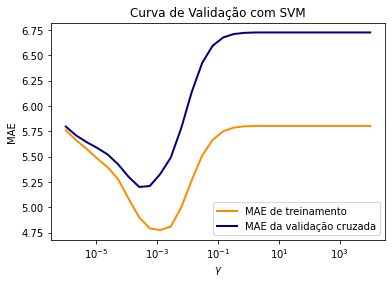

In [ ]:
# o gama ideal seria 10^-3, porque ele traz o menor erro de MAE na validação cruzada
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, 4, 30)
print(param_range)
train_scores, test_scores = validation_curve(
    SVR(kernel='rbf'), X_train, y_train, param_name="gamma", param_range=param_range,
    cv=10, scoring="neg_mean_absolute_error", n_jobs=1)
train_scores_mean = -1.0 * np.mean(train_scores, axis=1)
test_scores_mean = -1.0 * np.mean(test_scores, axis=1)

plt.title("Curva de Validação com SVM")
plt.xlabel("$\gamma$")
plt.ylabel("MAE")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="MAE de treinamento",
             color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="MAE da validação cruzada",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Vamos escolher o melhor valor de gamma e variar o C:

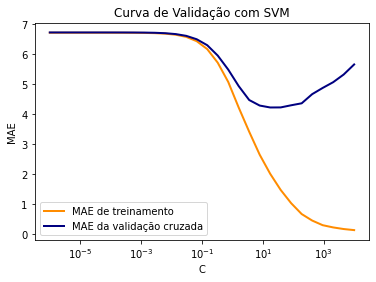

In [ ]:
param_range = np.logspace(-6, 4, 30)
train_scores, test_scores = validation_curve(
    SVR(kernel='rbf', gamma=0.001), X_train, y_train, param_name="C", param_range=param_range,
    cv=10, scoring="neg_mean_absolute_error", n_jobs=1)
train_scores_mean = -1.0 * np.mean(train_scores, axis=1)
test_scores_mean = -1.0 * np.mean(test_scores, axis=1)

plt.title("Curva de Validação com SVM")
plt.xlabel("C")
plt.ylabel("MAE")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="MAE de treinamento",
             color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="MAE da validação cruzada",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# Legal avaliar variando o gama e o c para compreender qual é o 
# melhor cenário, combinando o gráfico abaixo com o gráfico acima

-----------------

## SVRs com kernel linear e não-linear

Exemplo simples de regressão 1D usando kernels lineares e RBF.

*Fonte: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html*

In [ ]:
# Gera dados sintéticos

X = np.sort(5 * np.random.rand(40, 1), axis=0)
#ravel() devolve o array correspondente
y = np.sin(X).ravel()

print(X.shape)
print(y.shape)

(40, 1)
(40,)


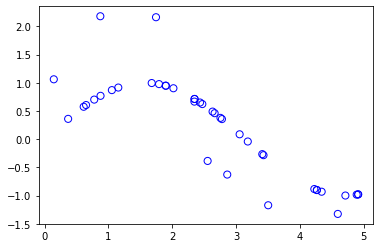

In [ ]:
# Adiciona algum ruído no target
y[::5] += 3 * (0.5 - np.random.rand(8))

plot_scatter(X, y)

In [ ]:
# Treina e testa o modelo de regressão

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.001)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)

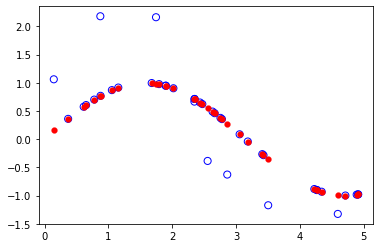

In [ ]:
plot_scatter(X, y, y_rbf)

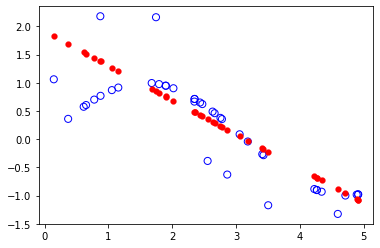

In [ ]:
plot_scatter(X, y, y_lin)

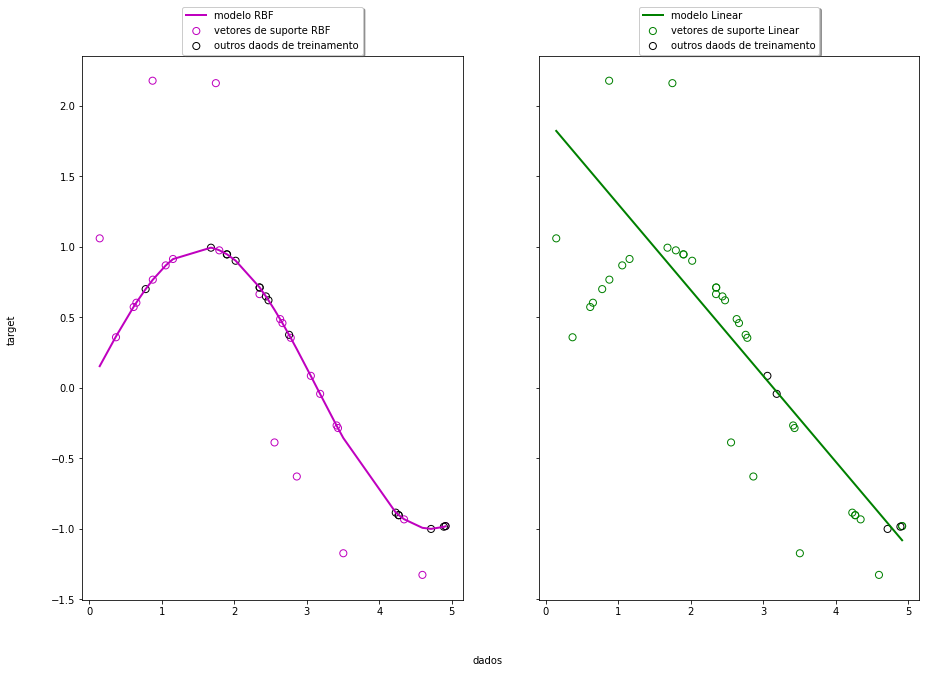

In [ ]:
# Uma melhor forma de visualizar os resultados

lw = 2
svrs = [svr_rbf, svr_lin]
kernel_label = ['RBF', 'Linear']
model_color = ['m', 'g']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='modelo {}'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='vetores de suporte {}'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='outros daods de treinamento')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'dados', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
plt.show()

In [ ]:
test_sample = np.array([2]).reshape(-1,1)

print(svr_rbf.predict(test_sample))
print(svr_lin.predict(test_sample))

[0.90995627]
[0.69249264]
